# 🧱🏭 **Training and Building of PVRE-MNIST Dataset**

**Source:** [Inducing Causal Structure for Interpretable Neural Networks]("https://arxiv.org/pdf/2112.00826.pdf")

## 📝 Notes:

* Input is a grid of $4$ images of mnist. 
* The $4$ input images are defined as $(I_{TL}, I_{TR}, I_{BL}, T_{BR})$
* It creates a test split designed in a way by removing examples from train examples, which meets the following conditions:
    * Top right image $(i_{TR}) \in \{1,2,3\}$, $(i_{BL}) \in \{4,5,6\}$ or $(i_{BR}) \in \{0,7,8,9\}$  



## 📊👨🏻‍💻 **Splitting the train-test split based on the condition**

* PVR-MNIST is created such that a test split designed in a way by removing examples from train examples, which meets the following conditions:
    * Top right image $(i_{TR}) \in \{1,2,3\}$, $(i_{BL}) \in \{4,5,6\}$ or $(i_{BR}) \in \{0,7,8,9\}$  



In [1]:
from imports import *

In [131]:
# print(len(os.listdir("/Users/maheepchaudhary/pytorch/Projects/Stanford/pyvene-maheep/maheep/pvr_mnist")))

# Load the MNIST dataset
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
mnist_dataset = datasets.MNIST(root='./root', train=False, download=True, transform=transform)


# Get the images and labels from the MNIST dataset
images = mnist_dataset.data.numpy()
labels = mnist_dataset.targets.numpy()

# Create an empty list to store the combined images and labels
combined_images = []
combined_labels = []

print("I am running the new file.")


def pnc():
    min_value = 0
    max_value = 9999
    rows = 1000000
    columns = 4

    combinations = np.random.randint(min_value, max_value, size=(rows, columns), dtype=np.int64)
    
    return combinations

combinations = pnc()

p(images.shape)

# # Generate all possible combinations of 4 images
# image_combinations = combinations(range(len(images)), 4)


# I will have to create a million combinations, which are currently, way more than 1 million. 

# Iterate over each combination
for i in tqdm(range(len(combinations))):
# for i,combination in tqdm(enumerate(combinations)):
    # Get the images and labels for the current combination
    combined_image1 = np.concatenate([images[idx].reshape(28, 28) for idx in combinations[i][:2]], axis=0)
    combined_image2 = np.concatenate([images[idx].reshape(28, 28) for idx in combinations[i][2:]], axis=0)
    combined_image = np.concatenate([combined_image1, combined_image2], axis=1).reshape(56,56,1)

    combined_label = labels[list(combinations[i])]     

    # Convert the combined image to PIL image
    combined_image = transforms.ToPILImage()(combined_image)

    # Append the combined image and label to the dataset
    combined_images.append(combined_image)
    combined_labels.append(combined_label)

# Save the combined dataset
np.save('pvr_mnist_dataset/labels/combined_labels_now.npy', combined_labels)

# Save the combined images as individual image files
for i in tqdm(range(len(combined_images))):
    image = combined_images[i]
    image.save(f'pvr_mnist_dataset/images_now/combined_image_{i}.png')


I am running the new file.

(10000, 28, 28)


100%|██████████| 1000000/1000000 [04:26<00:00, 3751.24it/s]


In [3]:
folder_path = 'pvr_mnist_dataset/images_now/'

In [133]:
names = [i for i in os.listdir(folder_path)]
images = [[np.array(Image.open(os.path.join(folder_path,names[i])).convert('RGB')), int(*re.findall(r'\d+',names[i]))] for i in tqdm(range(len(names)))]

images_, labels = zip(*images)

# Convert to numpy arrays
images_np = np.array(images_)
labels_np = np.array(labels)

# Save images and labels to .npy files
np.save('images.npy', images_np)
np.save('labels.npy', labels_np)

100%|██████████| 1000000/1000000 [04:47<00:00, 3482.52it/s]


In [2]:
images = np.load('images.npy')
labels_index = np.load('labels.npy')
labels = np.load('pvr_mnist_dataset/labels/combined_labels_now.npy')

The format of the image is like:

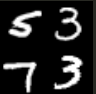

Meanwhile the label is in the format: array([5, 7, 3, 3]), i.e. $(i_{TL},i_{BL},i_{TR},i_{BR})$

In [3]:
train_image, test_image, train_label, test_label = [], [], [], []
test_all_label = []

def filter(images, labels):
    for image, label_index in tqdm(zip(images, labels_index)):
        label = list(labels[label_index])
        if label[2] in {1,2,3} or label[1] in {4,5,6} or label[-1] in {0,7,8,9}:
            test_image.append(image)
            test_label.append(label)
        else:
            train_image.append(image)
            train_label.append(label)

    return train_image, test_image, train_label, test_label

In [4]:
train_image, test_image, train_label, test_label = filter(images, labels)

1000000it [00:01, 854034.43it/s]


In [5]:
# Meanwhile the label is in the format: array([5, 7, 3, 3]), i.e. $(i_{TL},i_{BL},i_{TR},i_{BR})$

def updated_labels(labels):

    updated_labels_ = []
    updated_labels_aggr = []

    for label in tqdm(labels):
        if label[0] in {0,1,2,3}:
            updated_labels_.append(label[2])
            updated_labels_aggr.append(label)
        elif label[0] in {4,5,6}:
            updated_labels_.append(label[1])
            updated_labels_aggr.append(label)
        else:
            updated_labels_.append(label[-1])
            updated_labels_aggr.append(label)
    
    return updated_labels_, updated_labels_aggr

test_updated_labels, test_updated_labels_aggr = updated_labels(test_label)
train_updated_labels, train_updated_labels_aggr = updated_labels(train_label) 

100%|██████████| 293300/293300 [00:00<00:00, 6857281.05it/s]


(56, 56, 3)


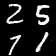

In [6]:
print(train_image[0].shape)
transforms.ToPILImage()(train_image[0])

In [7]:
train_updated_labels[0]

5

In [8]:
# train_image_tensors = torch.tensor(train_image).float()

In [9]:
# transforms.ToPILImage()(train_image_tensors[0])

In [10]:
# for image in tqdm(train_image):
#     transforms.ToPILImage()(image)

In [11]:
train_images = np.stack([np.array(train_image[i]) for i in tqdm(range(len(train_image)))])
train_images = train_images.astype(np.float32)
train_images = train_images/255.0
train_images = torch.from_numpy(train_images).reshape(-1,3,56,56)


test_images = np.stack([np.array(test_image[i]) for i in tqdm(range(len(test_image)))])
test_images = test_images.astype(np.float32)
test_images = test_images/255.0
test_images = torch.from_numpy(test_images).reshape(-1,3,56,56)


100%|██████████| 706700/706700 [00:02<00:00, 241104.27it/s]


In [12]:
type(train_images)

torch.Tensor

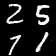

In [13]:
transforms.ToPILImage()(np.array(train_images[0]).reshape(56,56,-1))

In [14]:

# train_images = np.stack([np.array(transforms.ToPILImage()(image)) for image in tqdm(train_image)])
# print(train_images.shape)
# train_images = torch.tensor(train_images).float().reshape(-1, 3, 56, 56)
# print(train_images.shape)

# train_images


# test_images = np.stack([np.array(transforms.ToPILImage()(image)) for image in tqdm(test_image)])
# test_images = torch.tensor(test_images).float().reshape(-1, 3, 56, 56)
# # test_images = test_images.repeat(1, 3, 1, 1)

# test_images

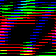

In [15]:
transforms.ToPILImage()(train_images[0])

In [16]:
train_images.shape

torch.Size([293300, 3, 56, 56])

We will have to modify the labels based on the condition: 

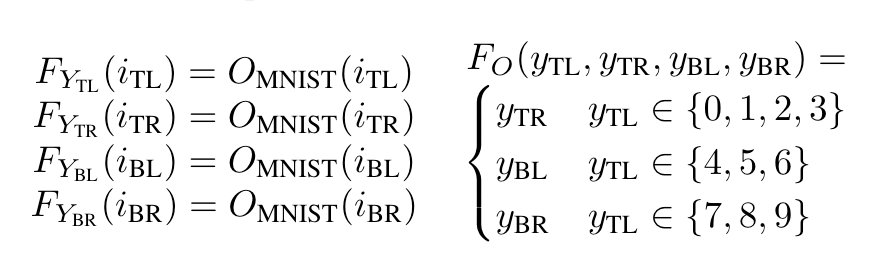

In [17]:
test_labels = torch.tensor(np.array(test_updated_labels)).long()
train_labels = torch.tensor(np.array(train_updated_labels)).long()
test_labels_aggr = torch.tensor(np.array(test_updated_labels_aggr)).long()
train_labels_aggr = torch.tensor(np.array(train_updated_labels_aggr)).long()

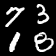

In [18]:
transforms.ToPILImage()(np.array(test_images[0]).reshape(56,56,3))

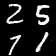

In [19]:
transforms.ToPILImage()(np.array(train_images[0]).reshape(56,56,3))

## 🚅🏋🏻‍♂️ **Training the ResNet on PVR-MNIST Dataset**

In [20]:
import transformers
from transformers import ResNetForImageClassification, ResNetConfig
from imports import *

# ResNetConfig.num_labels = 10
resnet = ResNetForImageClassification.from_pretrained("/Users/maheepchaudhary/pytorch/Projects/Stanford/new_branch/pyvene/resnet_pvr_model", num_labels=10)
resnet.config

ResNetConfig {
  "_name_or_path": "/Users/maheepchaudhary/pytorch/Projects/Stanford/new_branch/pyvene/resnet_pvr_model",
  "architectures": [
    "ResNetForImageClassification"
  ],
  "depths": [
    3,
    4,
    6,
    3
  ],
  "downsample_in_bottleneck": false,
  "downsample_in_first_stage": false,
  "embedding_size": 64,
  "hidden_act": "relu",
  "hidden_sizes": [
    256,
    512,
    1024,
    2048
  ],
  "id2label": {
    "0": "LABEL_0",
    "1": "LABEL_1",
    "2": "LABEL_2",
    "3": "LABEL_3",
    "4": "LABEL_4",
    "5": "LABEL_5",
    "6": "LABEL_6",
    "7": "LABEL_7",
    "8": "LABEL_8",
    "9": "LABEL_9"
  },
  "label2id": {
    "LABEL_0": 0,
    "LABEL_1": 1,
    "LABEL_2": 2,
    "LABEL_3": 3,
    "LABEL_4": 4,
    "LABEL_5": 5,
    "LABEL_6": 6,
    "LABEL_7": 7,
    "LABEL_8": 8,
    "LABEL_9": 9
  },
  "layer_type": "bottleneck",
  "model_type": "resnet",
  "num_channels": 3,
  "out_features": [
    "stage4"
  ],
  "out_indices": [
    4
  ],
  "pooler_shape": [
  

In [21]:
resnet

ResNetForImageClassification(
  (resnet): ResNetModel(
    (embedder): ResNetEmbeddings(
      (embedder): ResNetConvLayer(
        (convolution): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
        (normalization): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (activation): ReLU()
      )
      (pooler): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    )
    (encoder): ResNetEncoder(
      (stages): ModuleList(
        (0): ResNetStage(
          (layers): Sequential(
            (0): ResNetBottleNeckLayer(
              (shortcut): ResNetShortCut(
                (convolution): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
                (normalization): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
              )
              (layer): Sequential(
                (0): ResNetConvLayer(
                  (convolution): Conv2d(64

In [101]:
# Ensure the model is on the correct device
device = torch.device("mps")
print(device)
resnet = resnet.to(device)

# Loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(resnet.parameters(), lr=0.0001)

# Number of training epochs
num_epochs = 10

mps


In [102]:
import pyvene as pv
import random

def calculate_accuracy(model, images, labels, device, batch_size):
    model.eval()
    correct = 0
    total = 0

    with torch.no_grad():
        for i in range(0, len(images), batch_size):
            data = images[i:i+batch_size].to(device)
            target = labels[i:i+batch_size].to(device)

            outputs = model(data)
            logits = outputs.logits 
            _, predicted = torch.max(logits.data, 1)

            total += target.size(0)
            correct += (predicted == target).sum().item()

    return 100 * correct / total

validation_fraction = 0.2  


num_training_samples = len(train_labels)
num_validation_samples = int(num_training_samples * validation_fraction)


val_indices = np.random.choice(num_training_samples, num_validation_samples, replace=False)
train_indices = np.array(list(set(range(num_training_samples)) - set(val_indices)))


val_images = train_images[val_indices]
val_labels = train_labels[val_indices]
val_labels_aggr = train_labels_aggr[val_indices] 
new_train_images = train_images[train_indices]
new_train_labels = train_labels[train_indices]
new_train_labels_aggr = train_labels_aggr[train_indices]



# mean, std = 0.1307, 0.3081
# train_images = (train_images - mean) / std  


# batch_size = 2000  
batch_size = 1

resnet.train() 
for param in resnet.parameters():
    param.requires_grad = True

**<h1>⚒️ InterChange Intervention</h1>**


We have made $2$ functions that are responsible for doing interchange intervention based on the randomly chosen quadrant of the image. 

<img src="quadrants.png" width="1000" height="700">
<!-- 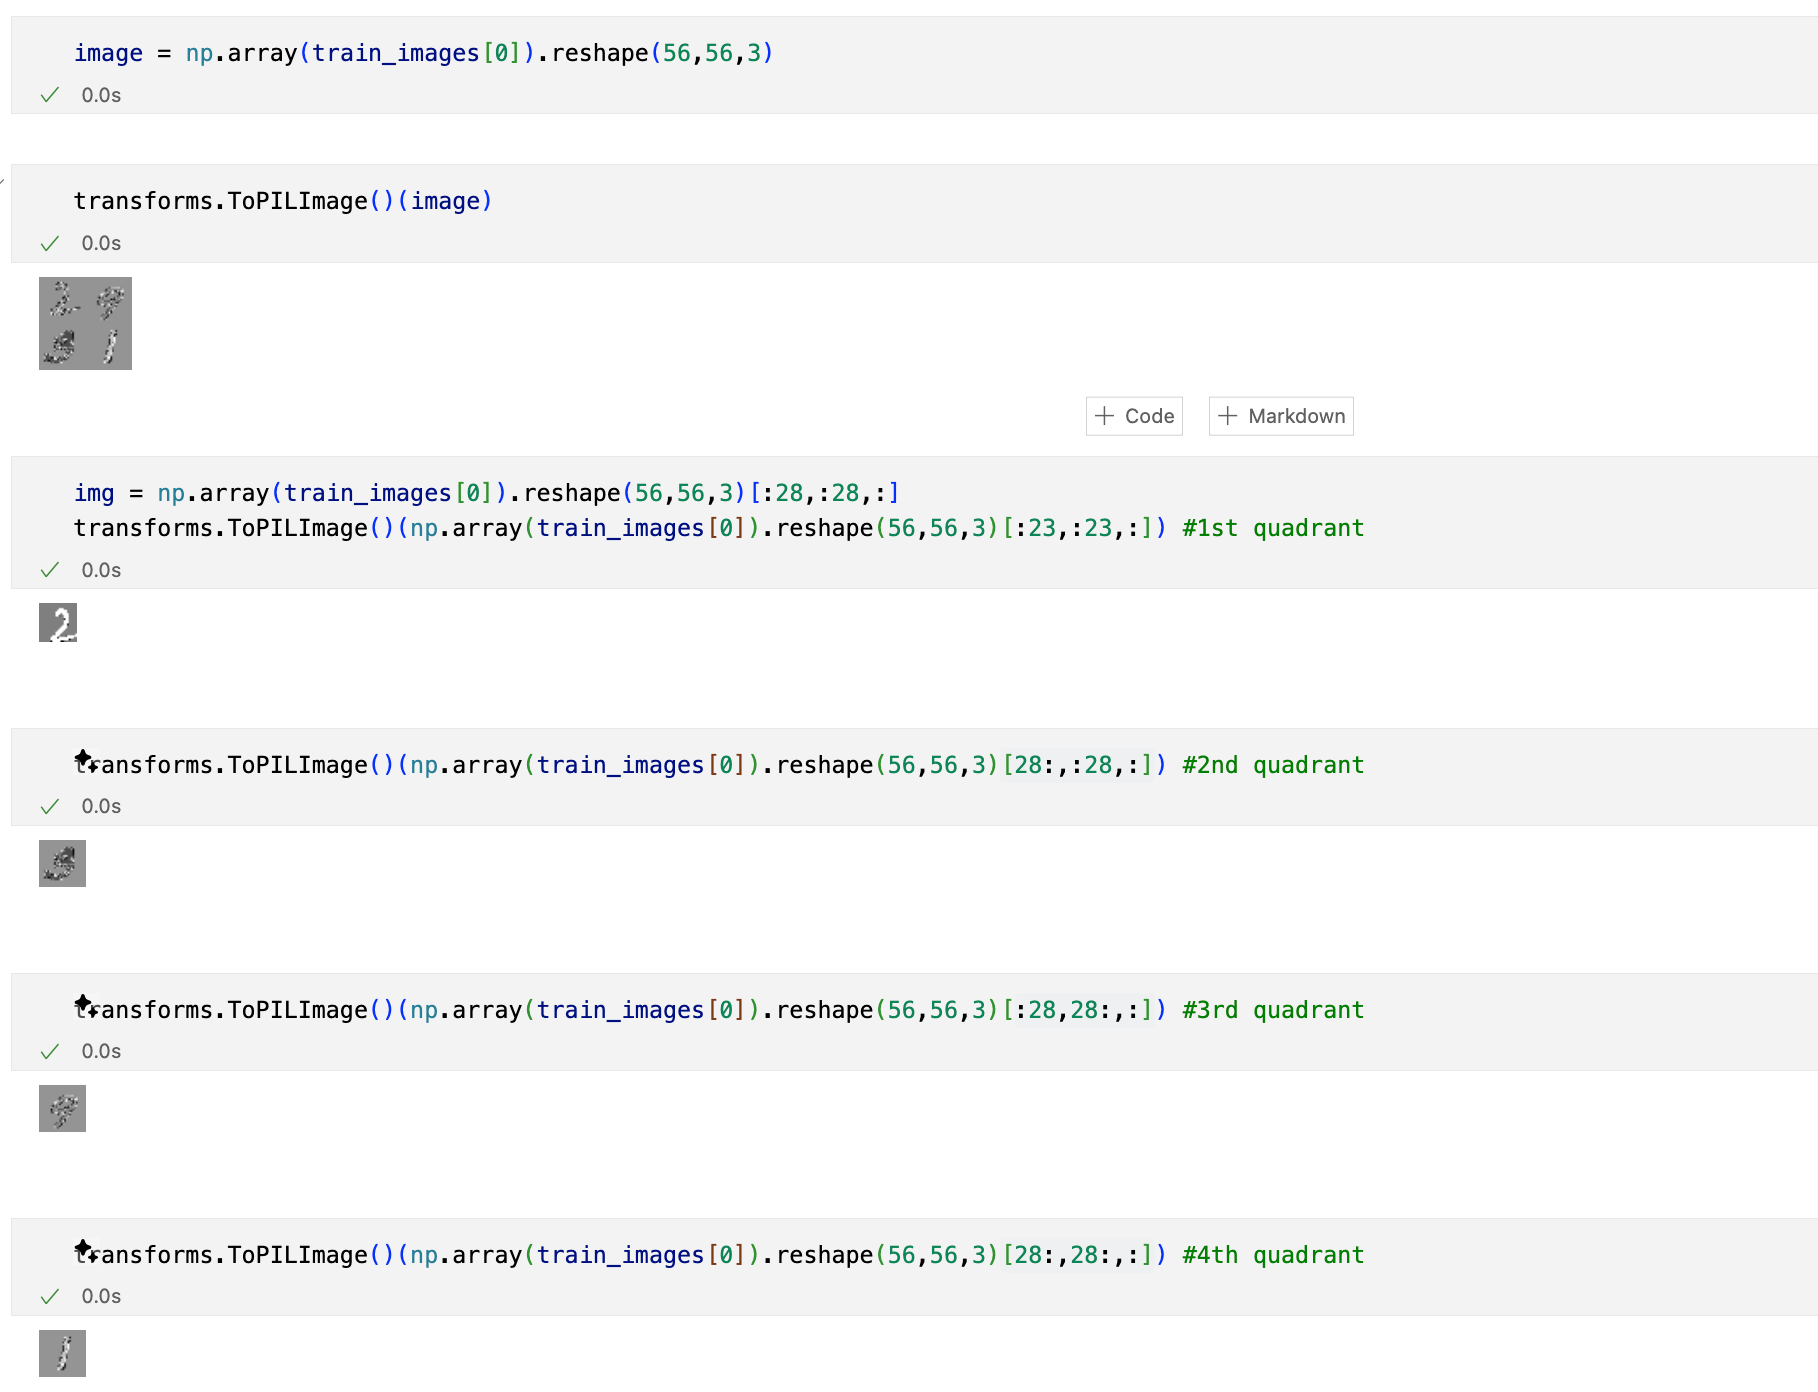 -->

based on the identified quadrants of another image and the labelling order, as defined below:

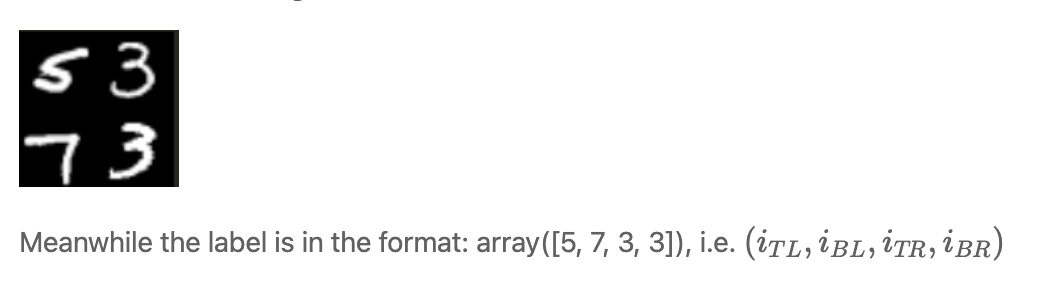

Hence, we develop two functions that we will tell about below:

* `masks()`
    - The quadrants are being initialized randomly in the training loop for each sample, as the batch size is `1`.
    - Based on the identification of the quadrants we define the base array containing the ones at major position, except at the quadrant where intervention is to be performed. 

We define another function, i.e. "label" which identifies the label to be given to the image. 

* `label()`
    - Quadrant 1 intervention
        - If the intervention gets performed onto the 1st quadrant, then the pointer will points to different quadrant, hence its label will change based on the base image only but the quadrant to be pointed will be changed and when figured out will be the label of it. 
    - Quadrant 2 intervention
        - If the intervention is performed on the second quadrant then the label will only change when the pointer points to 2nd quadrant, i.e. when the pointer lies in {4,5,6}, hence defining the label to be the value of the source label, i.e. [1]
    - Quadrant 3 intervention
        - If the intervention is performed on the third quadrant then the label will only change when the pointer points to 3rd quadrant, i.e. when the pointer lies in {0,1,2,3}, hence defining the label to be the value of the source label, i.e. [2]
    - Quadrant 4 intervention
        - If the intervention is performed on the third quadrant then the label will only change when the pointer points to 4th quadrant, i.e. when the pointer lies in {7,8,9}, hence defining the label to be the value of the source label, i.e. [3]

In [92]:


def masks(source_array, base_array, quadrants):

    # print(*quadrants)
    source_quadrant, base_quadrant = *quadrants[0],
    # I will have to convert them to tensors in order to pass them inside the model, 
    # such that they get computed inside the model.
    g = 7  
    if base_quadrant == 1:
        if source_quadrant == 1: 
            base_array[:,:,:g,:g] = source_array[:,:,:g,:g]
        elif source_quadrant == 2:
            base_array[:,:,:g,:g] = source_array[:,:,g:,:g]
        elif source_quadrant == 3:
            base_array[:,:,:g,:g] = source_array[:,:,:g,g:]
        elif source_quadrant == 4:
            base_array[:,:,:g,:g] = source_array[:,:,g:,g:]
    
    elif base_quadrant == 2:
        if source_quadrant == 1:
            base_array[:,:,g:,:g] = source_array[:,:,:g,:g]
        elif source_quadrant == 2:
            base_array[:,:,g:,:g] = source_array[:,:,g:,:g]
        elif source_quadrant == 3:
            base_array[:,:,g:,:g] = source_array[:,:,:g,g:]
        elif source_quadrant == 4:
            base_array[:,:,g:,:g] = source_array[:,:,g:,g:]
    
    elif base_quadrant == 3:
        if source_quadrant == 1:
            base_array[:,:,:g,g:] = source_array[:,:,:g,:g]
        elif source_quadrant == 2:
            base_array[:,:,:g,g:] = source_array[:,:,g:,:g]
        elif source_quadrant == 3:
            base_array[:,:,:g,g:] = source_array[:,:,:g,g:]
        elif source_quadrant == 4:
            base_array[:,:,:g,g:] = source_array[:,:,g:,g:]
    
    elif base_quadrant == 4:
        if source_quadrant == 1:
            base_array[:,:,g:,g:] = source_array[:,:,:g,:g]
        elif source_quadrant == 2:
            base_array[:,:,g:,g:] = source_array[:,:,g:,:g]
        elif source_quadrant == 3:
            base_array[:,:,g:,g:] = source_array[:,:,:g,g:]
        elif source_quadrant == 4:
            base_array[:,:,g:,g:] = source_array[:,:,g:,g:]
    

    return base_array


def label(source_quadrant, base_quadrant, source_label, base_label, target):
    
    index = source_quadrant - 1
    # print(base_label)
    
    if base_quadrant == 1:
        
        # print(source_label[0])
        # print("Quadrant 1")
        if int(source_label[index]) in {0,1,2,3}:
            # label_output = torch.tensor(np.array([base_label[2]])).long().to(device)
            label_output = int(base_label[2])
        elif int(source_label[index]) in {4,5,6}:
            # label_output = torch.tensor(np.array([base_label[1]])).long().to(device)
            label_output = int(base_label[1])
            # source_target = train_label[i][1]
        elif int(source_label[index]) in {7,8,9}:
            # label_output = torch.tensor(np.array([base_label[3]])).long().to(device)
            label_output = int(base_label[3])

    elif base_quadrant == 2:
        # print("Quadrant 2")
        if int(base_label[0]) in {4,5,6}:
            # label_output = torch.tensor(np.array([source_label[1]])).long().to(device)
            label_output = int(source_label[index])
        else:
            label_output = target

    elif base_quadrant == 3:
        # print("Quadrant 3")
        if int(base_label[0]) in {0,1,2,3}:
            # label_output = torch.tensor(np.array([source_label[2]])).long().to(device)
            label_output = int(source_label[index])
        else:
            label_output = target

    elif base_quadrant == 4:
        # print("Quadrant 4")
        if int(base_label[0]) in {7,8,9}:
            # label_output = torch.tensor(np.array([source_label[3]])).long().to(device)
            label_output = int(source_label[index])
        else:
            label_output = target

    # print(type(label_output))
    label_output = torch.tensor(np.array([int(label_output)])).long().to(device)

    # print("Label output: ", label_output)
    

    return label_output

'''
pv_resnet = pv.IntervenableModel({
        "component": "resnet.embedder.pooler.output", 
#         # "intervention": lambda b, s: b * (1. - m) + s * m},  
       "intervention": lambda b, s: s + b * 0.}, # I have kind of done the simple intervention to 
        # "intervention": lambda b,s: torch.nn.Parameter(s + b * 0., requires_grad=True)},
        model=resnet
    ).to(device)
'''

pv_resnet = pv.IntervenableModel({
"component": "resnet.embedder.pooler.output", 
# "intervention": lambda b, z: b*z[2] + z[0]*z[1]},  
# "intervention": lambda b, z: b*0. + z*1.},
"intervention": masks}, 
# "intervention": lambda b, z: b*0. + z*1.},  
model=resnet
).to(device)



We will have to modify the labels based on the condition: 

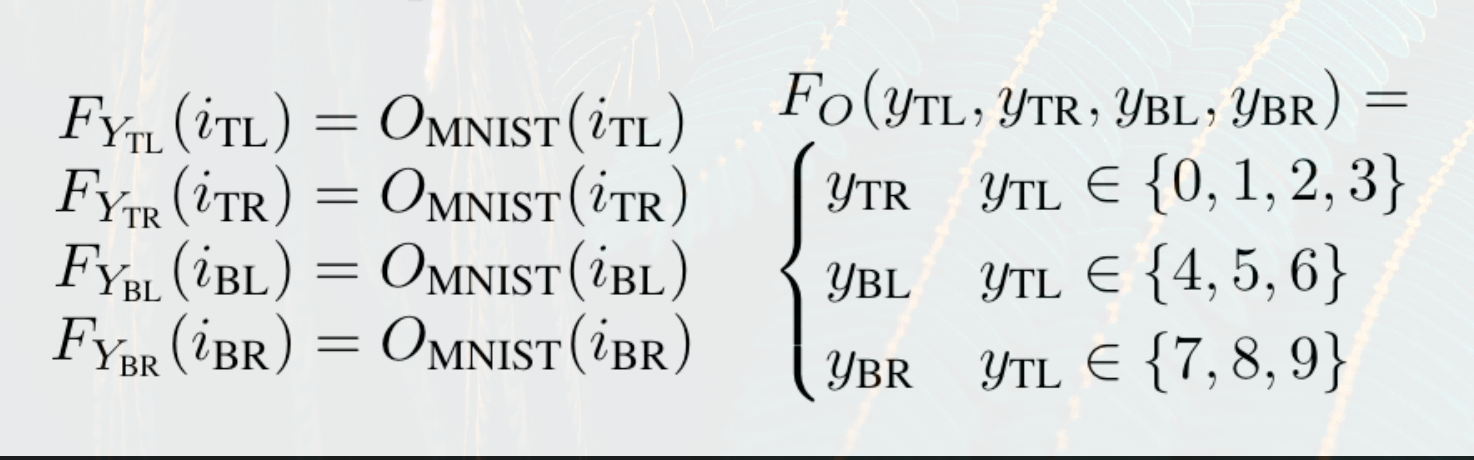

* PVR-MNIST is created such that a test split designed in a way by removing examples from train examples, which meets the following conditions:
    * Top right image $(i_{TR}) \in \{1,2,3\}$, $(i_{BL}) \in \{4,5,6\}$ or $(i_{BR}) \in \{0,7,8,9\}$  



In [103]:
validation_fraction = 0.2  


# num_training_samples = len(train_labels[:100])
num_training_samples = len(train_labels[:])
num_validation_samples = int(num_training_samples * validation_fraction)


val_indices = np.random.choice(num_training_samples, num_validation_samples, replace=False)
train_indices = np.array(list(set(range(num_training_samples)) - set(val_indices)))


val_images = train_images[val_indices]
val_labels = train_labels[val_indices]
val_labels_aggr = train_labels_aggr[val_indices]
new_train_images = train_images[train_indices]
new_train_labels = train_labels[train_indices]
new_train_labels_aggr = train_labels_aggr[train_indices]

print(len(new_train_images))

80


In [104]:
def quadrant_choice():
    source_quadrant = random.randint(1,4)
    base_quadrant = random.randint(1,4)
    while source_quadrant != base_quadrant:
        base_quadrant = random.randint(1,4)
    
    return source_quadrant, base_quadrant

In [105]:
new_train_images[0:1].shape

torch.Size([1, 3, 56, 56])

In [106]:
def quadrant_choice():
    source_quadrant = random.randint(1,4)
    base_quadrant = random.randint(1,4)
    # while source_quadrant == base_quadrant:
    #     base_quadrant = random.randint(1,4)
    
    return source_quadrant, base_quadrant


for epoch in tqdm(range(num_epochs)):
    total_loss = 0

    for i in tqdm(range(0, len(new_train_images), batch_size)):
        
        data = new_train_images[i:i+batch_size].to(device)
        target = new_train_labels[i:i+batch_size].to(device)
        source_inputs = new_train_images[i].reshape(1,3,56,56).to(device)       
        source_label = new_train_labels_aggr[i].to(device)
        base_label = new_train_labels_aggr[i].to(device)
        
        source_quadrant, base_quadrant = quadrant_choice()
        labels = label(source_quadrant, base_quadrant, source_label, base_label, target)
        # bm = masks(source_inputs, source_inputs, source_quadrant, base_quadrant) 
        # As both the source_inputs and base_inputs are the same, 
        # so we can use the same image for both the source and base
        
        # bm = torch.tensor(bm, dtype = torch.float32).to(device)
        # sm = torch.tensor(sm, dtype = torch.float32).to(device)

        retain_graph = True
        pv_resnet.enable_model_gradients()

        intervened_outputs = pv_resnet(
            # {"pixel_values":data}, [{"pixel_values":(source_inputs, sm, bm)}], return_dict=True
            # {"pixel_values":data}, [{"pixel_values":(bm)}], 
            {"pixel_values":data}, [{"pixel_values":(source_inputs)}],
            subspaces=[base_quadrant, source_quadrant], 
            return_dict=True
        )

        output = intervened_outputs["original_outputs"]
        source_output = intervened_outputs["intervened_outputs"]
        logits = output.logits 
        intervened_logits = source_output.logits
        loss = criterion(logits, target)
        intervened_loss = criterion(intervened_logits, labels)
        
        optimizer.zero_grad()
        intervened_loss.backward(retain_graph=True)
        loss.backward()
        optimizer.step()
        total_loss += loss.item() + intervened_loss.item()


    train_loss = total_loss / (len(new_train_images) // batch_size)

    train_accuracy = calculate_accuracy(resnet, new_train_images, new_train_labels, device, batch_size)
    val_accuracy = calculate_accuracy(resnet, val_images, val_labels, device, batch_size)

    print(f'Epoch {epoch+1}, Train Loss: {train_loss:.4f}, Train Accuracy: {train_accuracy:.2f}%, Val Accuracy: {val_accuracy:.2f}%')

 10%|█         | 1/10 [00:13<02:00, 13.36s/it]

Epoch 1, Train Loss: 1.3691, Train Accuracy: 76.25%, Val Accuracy: 70.00%


 20%|██        | 2/10 [00:26<01:45, 13.24s/it]

Epoch 2, Train Loss: 1.1686, Train Accuracy: 80.00%, Val Accuracy: 60.00%


 30%|███       | 3/10 [00:39<01:31, 13.14s/it]

Epoch 3, Train Loss: 1.2275, Train Accuracy: 77.50%, Val Accuracy: 70.00%


 40%|████      | 4/10 [00:52<01:18, 13.15s/it]

Epoch 4, Train Loss: 1.0786, Train Accuracy: 80.00%, Val Accuracy: 55.00%


 50%|█████     | 5/10 [01:09<01:11, 14.37s/it]

Epoch 5, Train Loss: 0.7421, Train Accuracy: 82.50%, Val Accuracy: 65.00%


 60%|██████    | 6/10 [01:31<01:07, 16.99s/it]

Epoch 6, Train Loss: 0.9495, Train Accuracy: 80.00%, Val Accuracy: 55.00%


 70%|███████   | 7/10 [01:46<00:49, 16.47s/it]

Epoch 7, Train Loss: 1.0014, Train Accuracy: 78.75%, Val Accuracy: 65.00%


 80%|████████  | 8/10 [01:59<00:30, 15.33s/it]

Epoch 8, Train Loss: 0.9163, Train Accuracy: 78.75%, Val Accuracy: 60.00%


 90%|█████████ | 9/10 [02:13<00:14, 14.76s/it]

Epoch 9, Train Loss: 1.1437, Train Accuracy: 76.25%, Val Accuracy: 65.00%


100%|██████████| 10/10 [02:26<00:00, 14.64s/it]

Epoch 10, Train Loss: 1.2101, Train Accuracy: 76.25%, Val Accuracy: 55.00%


In [102]:
# data = test_images[0:1].to(device)

In [103]:
# intervened_outputs = pv_resnet({"pixel_values":data}, [{"pixel_values":(bm)}], return_dict=True)

In [104]:
# print(intervened_outputs)

IntervenableModelOutput(original_outputs=ImageClassifierOutputWithNoAttention(loss=None, logits=tensor([[ -8.8301,  -8.9989,  -9.2693, -11.4117, -10.2770,  -7.7454,  -7.8443,
          -9.6564,  -7.1375,  -8.9521]], device='mps:0'), hidden_states=None), intervened_outputs=ImageClassifierOutputWithNoAttention(loss=None, logits=tensor([[ -8.8301,  -8.9989,  -9.2693, -11.4117, -10.2770,  -7.7454,  -7.8443,
          -9.6564,  -7.1375,  -8.9521]], device='mps:0'), hidden_states=None), collected_activations=None)


In [105]:
# pv_resnet.save_pretrained('resnet_pvr_model')

AttributeError: 'IntervenableModel' object has no attribute 'save_pretrained'

In [121]:
print(os.getcwd())

/Users/maheepchaudhary/pytorch/Projects/Stanford/new_branch/pyvene


In [122]:
# !mkdir "saved_model"

In [125]:
# pv_resnet.save("saved_models")

Directory 'saved_models' created successfully.


AttributeError: 'function' object has no attribute 'source_representation'

In [106]:
# torch.save(pv_resnet.state_dict(), 'resnet_pvr_model/resnet_state_dict.pth')

In [107]:
# resnet_trained = pv.IntervenableModel({
# "component": "resnet.embedder.pooler.output", 
# # "intervention": lambda b, z: b*z[2] + z[0]*z[1]},  
# "intervention": lambda b, z: b*0. + z*1.},  
# model=resnet
# ).to(device)

# resnet_trained.load_state_dict(torch.load("resnet_pvr_model/resnet_state_dict.pth"))
# resnet_trained.eval()

TypeError: IntervenableModel.train() missing 3 required positional arguments: 'compute_loss', 'compute_metrics', and 'inputs_collator'

In [127]:
# import torch
# import pyvene as pv
# # built-in helper to get a HuggingFace model
# _, tokenizer, gpt2 = pv.create_gpt2()
# # create with dict-based config
# pv_config = pv.IntervenableConfig({
#   "layer": 0, "component": "mlp_output"})
# #initialize model
# pv_gpt2 = pv.IntervenableModel(pv_config, model=gpt2)
# # run an intervened forward pass
# intervened_outputs = pv_gpt2(
#   # the intervening base input
#   base=tokenizer("The capital of Spain is", return_tensors="pt"), 
#   # the location to intervene at (3rd token)
#   unit_locations={"base": 3},
#   # the individual dimensions targetted
#   subspaces=[10,11,12],
#   # source_representations=torch.zeros(gpt2.config.n_embd)
# )
# # sharing
# pv_gpt2.save("./tmp/")

loaded model
Directory './tmp/' created successfully.


## 🪨🔨 Evaluation

In [ ]:
prediction = pv_resnet.model(image)

In [ ]:
resnet.eval()

In [94]:
# from imports import *
# from transformers import ResNetForImageClassification, ResNetConfig

# resnet_trained = ResNetForImageClassification.from_pretrained('resnet_pvr_model').to(device)

In [95]:
# resnet_trained.eval()

ResNetForImageClassification(
  (resnet): ResNetModel(
    (embedder): ResNetEmbeddings(
      (embedder): ResNetConvLayer(
        (convolution): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
        (normalization): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (activation): ReLU()
      )
      (pooler): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    )
    (encoder): ResNetEncoder(
      (stages): ModuleList(
        (0): ResNetStage(
          (layers): Sequential(
            (0): ResNetBottleNeckLayer(
              (shortcut): ResNetShortCut(
                (convolution): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
                (normalization): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
              )
              (layer): Sequential(
                (0): ResNetConvLayer(
                  (convolution): Conv2d(64

Evaluated on the trained ResNet Model. 

In [34]:
# test_images[0:1].size()

torch.Size([1, 3, 56, 56])

In [109]:
i = 0
batch_size = 1
data = test_images[i:i+batch_size].to(device)
target = test_labels[i:i+batch_size].to(device)
source_inputs = test_images[i].reshape(1,3,56,56).to(device)       
source_label = new_train_labels_aggr[i].to(device)
base_label = new_train_labels_aggr[i].to(device)

source_quadrant, base_quadrant = quadrant_choice()
# labels = label(source_quadrant, base_quadrant, source_label, base_label, target)
# bm = masks(source_inputs, source_inputs, source_quadrant, base_quadrant) 
# As both the source_inputs and base_inputs are the same, so we can use the same image for both the source and base

# bm = torch.tensor(bm, dtype = torch.float32).to(device)
j = 0

with torch.no_grad():
    for i in tqdm(range(len(test_images))):
        image = test_images[i:i+1].to(device)
        # outputs = (image)
        # I have passed the image as source also, as it will create no intervention during inference.
        # outputs = pv_resnet({"pixel_values":image}, [{"pixel_values":(image)}], return_dict=True)
        # original_output = outputs["original_outputs"]
        # intervened_output = outputs["intervened_outputs"]
        original_output = pv_resnet.model(image)

        # print(original_output.logits.argmax())
        # print(test_labels[i])
        if original_output.logits.argmax() == test_labels[i]:
            j+=1
        # if i == 100:
    print(f"The accuracy of the model is:{j/i}")
            # break

  0%|          | 100/706700 [00:01<3:02:48, 64.42it/s]

The accuracy of the model is:0.24


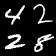

In [114]:
# transforms.ToPILImage()(np.array(image.to('cpu')).reshape(56,56,3))


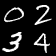

In [56]:
# transforms.ToPILImage()(np.array(image.to('cpu')).reshape(56,56,3))


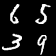

In [47]:
# transforms.ToPILImage()(np.array(image.to('cpu')).reshape(56,56,3))

In [56]:
# import random

# resnet_trained = pv_resnet

# correct = 0
# total = 0
# device = torch.device("mps")
# # resnet_trained.eval().to(device)
# # resnet_trained = resnet

# with torch.no_grad():
#     for i in tqdm(range(len(test_images))):
#         # Move tensors to the configured device
#         # images = test_images[i].unsqueeze(0)
#         k = random.randint(0,len(test_images))
#         image = test_images[k].unsqueeze(0)
#         images = image.to(device)
#         labels = torch.tensor([test_labels[i]]).to(device)
        
#         # Forward pass: compute the model output
#         outputs = pv_resnet(images)
#         original_output = outputs["original_outputs"]
#         # original_output.logits
#         # Get the predictions
#         _, predicted = torch.max(original_output.logits, 1)
        
#         # Update the counts
#         total += labels.size(0)
#         correct += (predicted == labels).sum().item()
        
#         if i == 10000:
#             break

# # Calculate the accuracy
# accuracy = 100 * correct / total
# print(f'Accuracy of the model on the training images: {accuracy:.2f}%') 

  0%|          | 0/706818 [00:00<?, ?it/s]


TypeError: ResNetForImageClassification(
  (resnet): ResNetModel(
    (embedder): ResNetEmbeddings(
      (embedder): ResNetConvLayer(
        (convolution): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
        (normalization): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (activation): ReLU()
      )
      (pooler): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    )
    (encoder): ResNetEncoder(
      (stages): ModuleList(
        (0): ResNetStage(
          (layers): Sequential(
            (0): ResNetBottleNeckLayer(
              (shortcut): ResNetShortCut(
                (convolution): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
                (normalization): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
              )
              (layer): Sequential(
                (0): ResNetConvLayer(
                  (convolution): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
                  (normalization): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
                  (activation): ReLU()
                )
                (1): ResNetConvLayer(
                  (convolution): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
                  (normalization): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
                  (activation): ReLU()
                )
                (2): ResNetConvLayer(
                  (convolution): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
                  (normalization): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
                  (activation): Identity()
                )
              )
              (activation): ReLU()
            )
            (1): ResNetBottleNeckLayer(
              (shortcut): Identity()
              (layer): Sequential(
                (0): ResNetConvLayer(
                  (convolution): Conv2d(256, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
                  (normalization): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
                  (activation): ReLU()
                )
                (1): ResNetConvLayer(
                  (convolution): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
                  (normalization): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
                  (activation): ReLU()
                )
                (2): ResNetConvLayer(
                  (convolution): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
                  (normalization): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
                  (activation): Identity()
                )
              )
              (activation): ReLU()
            )
            (2): ResNetBottleNeckLayer(
              (shortcut): Identity()
              (layer): Sequential(
                (0): ResNetConvLayer(
                  (convolution): Conv2d(256, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
                  (normalization): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
                  (activation): ReLU()
                )
                (1): ResNetConvLayer(
                  (convolution): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
                  (normalization): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
                  (activation): ReLU()
                )
                (2): ResNetConvLayer(
                  (convolution): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
                  (normalization): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
                  (activation): Identity()
                )
              )
              (activation): ReLU()
            )
          )
        )
        (1): ResNetStage(
          (layers): Sequential(
            (0): ResNetBottleNeckLayer(
              (shortcut): ResNetShortCut(
                (convolution): Conv2d(256, 512, kernel_size=(1, 1), stride=(2, 2), bias=False)
                (normalization): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
              )
              (layer): Sequential(
                (0): ResNetConvLayer(
                  (convolution): Conv2d(256, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
                  (normalization): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
                  (activation): ReLU()
                )
                (1): ResNetConvLayer(
                  (convolution): Conv2d(128, 128, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
                  (normalization): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
                  (activation): ReLU()
                )
                (2): ResNetConvLayer(
                  (convolution): Conv2d(128, 512, kernel_size=(1, 1), stride=(1, 1), bias=False)
                  (normalization): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
                  (activation): Identity()
                )
              )
              (activation): ReLU()
            )
            (1): ResNetBottleNeckLayer(
              (shortcut): Identity()
              (layer): Sequential(
                (0): ResNetConvLayer(
                  (convolution): Conv2d(512, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
                  (normalization): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
                  (activation): ReLU()
                )
                (1): ResNetConvLayer(
                  (convolution): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
                  (normalization): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
                  (activation): ReLU()
                )
                (2): ResNetConvLayer(
                  (convolution): Conv2d(128, 512, kernel_size=(1, 1), stride=(1, 1), bias=False)
                  (normalization): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
                  (activation): Identity()
                )
              )
              (activation): ReLU()
            )
            (2): ResNetBottleNeckLayer(
              (shortcut): Identity()
              (layer): Sequential(
                (0): ResNetConvLayer(
                  (convolution): Conv2d(512, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
                  (normalization): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
                  (activation): ReLU()
                )
                (1): ResNetConvLayer(
                  (convolution): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
                  (normalization): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
                  (activation): ReLU()
                )
                (2): ResNetConvLayer(
                  (convolution): Conv2d(128, 512, kernel_size=(1, 1), stride=(1, 1), bias=False)
                  (normalization): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
                  (activation): Identity()
                )
              )
              (activation): ReLU()
            )
            (3): ResNetBottleNeckLayer(
              (shortcut): Identity()
              (layer): Sequential(
                (0): ResNetConvLayer(
                  (convolution): Conv2d(512, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
                  (normalization): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
                  (activation): ReLU()
                )
                (1): ResNetConvLayer(
                  (convolution): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
                  (normalization): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
                  (activation): ReLU()
                )
                (2): ResNetConvLayer(
                  (convolution): Conv2d(128, 512, kernel_size=(1, 1), stride=(1, 1), bias=False)
                  (normalization): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
                  (activation): Identity()
                )
              )
              (activation): ReLU()
            )
          )
        )
        (2): ResNetStage(
          (layers): Sequential(
            (0): ResNetBottleNeckLayer(
              (shortcut): ResNetShortCut(
                (convolution): Conv2d(512, 1024, kernel_size=(1, 1), stride=(2, 2), bias=False)
                (normalization): BatchNorm2d(1024, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
              )
              (layer): Sequential(
                (0): ResNetConvLayer(
                  (convolution): Conv2d(512, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
                  (normalization): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
                  (activation): ReLU()
                )
                (1): ResNetConvLayer(
                  (convolution): Conv2d(256, 256, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
                  (normalization): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
                  (activation): ReLU()
                )
                (2): ResNetConvLayer(
                  (convolution): Conv2d(256, 1024, kernel_size=(1, 1), stride=(1, 1), bias=False)
                  (normalization): BatchNorm2d(1024, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
                  (activation): Identity()
                )
              )
              (activation): ReLU()
            )
            (1): ResNetBottleNeckLayer(
              (shortcut): Identity()
              (layer): Sequential(
                (0): ResNetConvLayer(
                  (convolution): Conv2d(1024, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
                  (normalization): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
                  (activation): ReLU()
                )
                (1): ResNetConvLayer(
                  (convolution): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
                  (normalization): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
                  (activation): ReLU()
                )
                (2): ResNetConvLayer(
                  (convolution): Conv2d(256, 1024, kernel_size=(1, 1), stride=(1, 1), bias=False)
                  (normalization): BatchNorm2d(1024, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
                  (activation): Identity()
                )
              )
              (activation): ReLU()
            )
            (2): ResNetBottleNeckLayer(
              (shortcut): Identity()
              (layer): Sequential(
                (0): ResNetConvLayer(
                  (convolution): Conv2d(1024, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
                  (normalization): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
                  (activation): ReLU()
                )
                (1): ResNetConvLayer(
                  (convolution): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
                  (normalization): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
                  (activation): ReLU()
                )
                (2): ResNetConvLayer(
                  (convolution): Conv2d(256, 1024, kernel_size=(1, 1), stride=(1, 1), bias=False)
                  (normalization): BatchNorm2d(1024, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
                  (activation): Identity()
                )
              )
              (activation): ReLU()
            )
            (3): ResNetBottleNeckLayer(
              (shortcut): Identity()
              (layer): Sequential(
                (0): ResNetConvLayer(
                  (convolution): Conv2d(1024, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
                  (normalization): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
                  (activation): ReLU()
                )
                (1): ResNetConvLayer(
                  (convolution): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
                  (normalization): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
                  (activation): ReLU()
                )
                (2): ResNetConvLayer(
                  (convolution): Conv2d(256, 1024, kernel_size=(1, 1), stride=(1, 1), bias=False)
                  (normalization): BatchNorm2d(1024, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
                  (activation): Identity()
                )
              )
              (activation): ReLU()
            )
            (4): ResNetBottleNeckLayer(
              (shortcut): Identity()
              (layer): Sequential(
                (0): ResNetConvLayer(
                  (convolution): Conv2d(1024, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
                  (normalization): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
                  (activation): ReLU()
                )
                (1): ResNetConvLayer(
                  (convolution): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
                  (normalization): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
                  (activation): ReLU()
                )
                (2): ResNetConvLayer(
                  (convolution): Conv2d(256, 1024, kernel_size=(1, 1), stride=(1, 1), bias=False)
                  (normalization): BatchNorm2d(1024, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
                  (activation): Identity()
                )
              )
              (activation): ReLU()
            )
            (5): ResNetBottleNeckLayer(
              (shortcut): Identity()
              (layer): Sequential(
                (0): ResNetConvLayer(
                  (convolution): Conv2d(1024, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
                  (normalization): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
                  (activation): ReLU()
                )
                (1): ResNetConvLayer(
                  (convolution): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
                  (normalization): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
                  (activation): ReLU()
                )
                (2): ResNetConvLayer(
                  (convolution): Conv2d(256, 1024, kernel_size=(1, 1), stride=(1, 1), bias=False)
                  (normalization): BatchNorm2d(1024, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
                  (activation): Identity()
                )
              )
              (activation): ReLU()
            )
          )
        )
        (3): ResNetStage(
          (layers): Sequential(
            (0): ResNetBottleNeckLayer(
              (shortcut): ResNetShortCut(
                (convolution): Conv2d(1024, 2048, kernel_size=(1, 1), stride=(2, 2), bias=False)
                (normalization): BatchNorm2d(2048, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
              )
              (layer): Sequential(
                (0): ResNetConvLayer(
                  (convolution): Conv2d(1024, 512, kernel_size=(1, 1), stride=(1, 1), bias=False)
                  (normalization): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
                  (activation): ReLU()
                )
                (1): ResNetConvLayer(
                  (convolution): Conv2d(512, 512, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
                  (normalization): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
                  (activation): ReLU()
                )
                (2): ResNetConvLayer(
                  (convolution): Conv2d(512, 2048, kernel_size=(1, 1), stride=(1, 1), bias=False)
                  (normalization): BatchNorm2d(2048, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
                  (activation): Identity()
                )
              )
              (activation): ReLU()
            )
            (1): ResNetBottleNeckLayer(
              (shortcut): Identity()
              (layer): Sequential(
                (0): ResNetConvLayer(
                  (convolution): Conv2d(2048, 512, kernel_size=(1, 1), stride=(1, 1), bias=False)
                  (normalization): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
                  (activation): ReLU()
                )
                (1): ResNetConvLayer(
                  (convolution): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
                  (normalization): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
                  (activation): ReLU()
                )
                (2): ResNetConvLayer(
                  (convolution): Conv2d(512, 2048, kernel_size=(1, 1), stride=(1, 1), bias=False)
                  (normalization): BatchNorm2d(2048, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
                  (activation): Identity()
                )
              )
              (activation): ReLU()
            )
            (2): ResNetBottleNeckLayer(
              (shortcut): Identity()
              (layer): Sequential(
                (0): ResNetConvLayer(
                  (convolution): Conv2d(2048, 512, kernel_size=(1, 1), stride=(1, 1), bias=False)
                  (normalization): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
                  (activation): ReLU()
                )
                (1): ResNetConvLayer(
                  (convolution): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
                  (normalization): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
                  (activation): ReLU()
                )
                (2): ResNetConvLayer(
                  (convolution): Conv2d(512, 2048, kernel_size=(1, 1), stride=(1, 1), bias=False)
                  (normalization): BatchNorm2d(2048, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
                  (activation): Identity()
                )
              )
              (activation): ReLU()
            )
          )
        )
      )
    )
    (pooler): AdaptiveAvgPool2d(output_size=(1, 1))
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=2048, out_features=10, bias=True)
  )
) argument after ** must be a mapping, not Tensor